# Problem 2.3

**Integrated Energy Grids**


**Problem 2.3**

**We assume the system from Problem 2.2.**


**a) Another system that is connected to ours --- assuming copper-plate --- decides dispatch just before we do and can export utility solar. The results from that dispatch optimization are saved in [problem2_3a](./data/problem2_3a.csv). Create a time series of available imports and their price.**
**b) Solve the updated problem with the available imports. Think of the imports as a generator with variable, marginal prices corresponding to the dual variables.**

We will use numpy to operate with arrays and matplotlib.pyplot to plot the results. We also use linopy to solve linear problems and work with pandas to work with dataframes.

In [1]:
import pandas as pd
import numpy as np
import linopy 
import matplotlib.pyplot as plt

Set parameter Username
Set parameter LicenseID to value 2767832
Academic license - for non-commercial use only - expires 2027-01-20


a)

Load the data for Problem 3a and also 2c to recreate the system from Problem 2c.

In [2]:
problem2c = pd.read_csv("./data/problem2_2c.csv", index_col=0, parse_dates=True)

problem3a = pd.read_csv("./data/problem2_3a.csv", index_col=0, parse_dates=True)
import_potential = problem3a["utility_solar_potential"] - problem3a["solution.utility_solar"]
import_prices = problem3a["dual.energy_balance"]

Plot import prices and the import potential

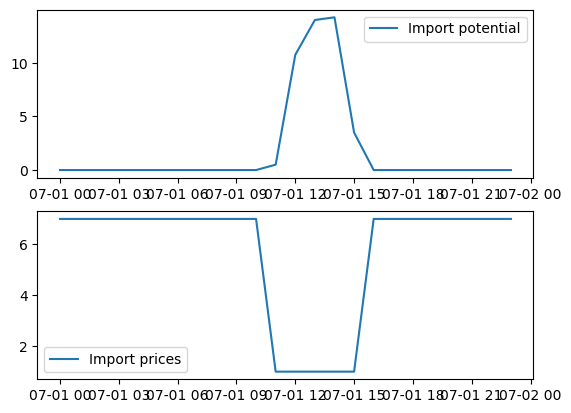

In [3]:
fig, ax = plt.subplots(2,1)

ax[0].plot(import_potential, label="Import potential")
ax[1].plot(import_prices, label="Import prices")

ax[0].legend()
ax[1].legend()


b)

Define the system as before.

In [4]:
# Installed capacities
wind = 15
solar = 20
gas = 20

# Marginal costs (for solar and wind 0)
cost_gas = 60



Set up the model.

In [5]:
m3b = linopy.Model()

time = problem3a.index

x_w = m3b.add_variables(lower=0,name="wind", coords=[time])
x_s = m3b.add_variables(lower=0,name="solar", coords=[time])
x_g = m3b.add_variables(lower=0,name="gas", coords=[time])
x_i = m3b.add_variables(lower=0,name="imports", coords=[time])

# Define constraints
m3b.add_constraints(x_w + x_s + x_g + x_i == problem2c["demand [MWh]"], name="energy_balance")
m3b.add_constraints(x_g <= gas, name="gas_cap")

m3b.add_constraints(x_w <= wind * problem2c["wind cf"], name="wind_cf")
m3b.add_constraints(x_s <= solar * problem2c["solar cf"], name="solar_cf")
m3b.add_constraints(x_i <= import_potential, name="import_cap")

# Optional:
m3b.add_constraints(x_w <= wind, name="wind_cap")
m3b.add_constraints(x_s <= solar, name="solar_cap")

# Objective
m3b.add_objective(cost_gas*x_g + import_prices.values*x_i, sense = "min")

# Solve
m3b.solve(solver_name="gurobi")

Set parameter Username
Set parameter LicenseID to value 2767832
Academic license - for non-commercial use only - expires 2027-01-20
Read LP format model from file /private/var/folders/zg/by4_k0616s98pw41wld9475c0000gp/T/linopy-problem-811ksqy0.lp
Reading time = 0.00 seconds
obj: 168 rows, 96 columns, 240 nonzeros
Gurobi Optimizer version 13.0.0 build v13.0.0rc1 (mac64[arm] - Darwin 25.2.0 25C56)

CPU model: Apple M3
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 168 rows, 96 columns and 240 nonzeros (Min)
Model fingerprint: 0xb8c70478
Model has 48 linear objective coefficients
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 6e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [4e-16, 2e+01]
Presolve removed 167 rows and 93 columns
Presolve time: 0.00s
Presolved: 1 rows, 3 columns, 3 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    7.5035000e+03   1.350000

('ok', 'optimal')

Plot the solution, and print objective value and stats about the electricity price (dual to energy balance)

<Axes: xlabel='dim_0'>

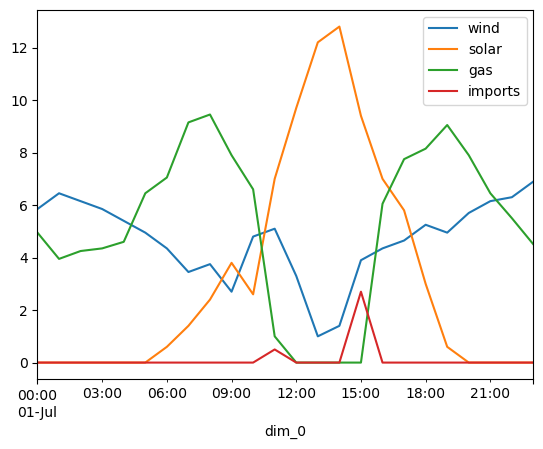

In [6]:
m3b.solution.to_dataframe().plot()

In [7]:
m3b.objective.value/24

312.7583333333333

In [8]:
m3b.dual.energy_balance.to_pandas().describe()

count    24.000000
mean     50.041667
std      22.747153
min       0.000000
25%      60.000000
50%      60.000000
75%      60.000000
max      60.000000
Name: energy_balance, dtype: float64

Plot the electricity prices from 2c and 3b. Recreate or copy the results from 2c.

In [9]:
# Recreate the model from 2c
m22c = linopy.Model()

# Define variables
time = problem2c.index

x_w = m22c.add_variables(lower=0,name="wind", coords=[time])
x_s = m22c.add_variables(lower=0,name="solar", coords=[time])
x_g = m22c.add_variables(lower=0,name="gas", coords=[time])

# Define constraints
m22c.add_constraints(x_w + x_s + x_g == problem2c["demand [MWh]"], name="energy_balance")
m22c.add_constraints(x_g <= gas, name="gas_cap")

m22c.add_constraints(x_w <= wind * problem2c["wind cf"], name="wind_cf")
m22c.add_constraints(x_s <= solar * problem2c["solar cf"], name="solar_cf")

# Optional:
m22c.add_constraints(x_w <= wind, name="wind_cap")
m22c.add_constraints(x_s <= solar, name="solar_cap")

# Objective
m22c.add_objective(cost_gas*x_g, sense = "min")

# Solve
m22c.solve(solver_name="gurobi")

m22c.solution


Set parameter Username
Set parameter LicenseID to value 2767832
Academic license - for non-commercial use only - expires 2027-01-20
Read LP format model from file /private/var/folders/zg/by4_k0616s98pw41wld9475c0000gp/T/linopy-problem-8q9xlek1.lp
Reading time = 0.00 seconds
obj: 144 rows, 72 columns, 192 nonzeros
Gurobi Optimizer version 13.0.0 build v13.0.0rc1 (mac64[arm] - Darwin 25.2.0 25C56)

CPU model: Apple M3
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 144 rows, 72 columns and 192 nonzeros (Min)
Model fingerprint: 0xc8549017
Model has 24 linear objective coefficients
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [6e+01, 6e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [6e-01, 2e+01]
Presolve removed 144 rows and 72 columns
Presolve time: 0.00s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    7.6950000e+03   0.000000e+0

<xarray.Dataset> Size: 768B
Dimensions:  (dim_0: 24)
Coordinates:
  * dim_0    (dim_0) datetime64[ns] 192B 2020-07-01 ... 2020-07-01T23:00:00
Data variables:
    wind     (dim_0) float64 192B 5.85 6.45 6.15 5.85 5.4 ... 5.7 6.15 6.3 6.9
    solar    (dim_0) float64 192B 0.0 0.0 0.0 0.0 0.0 ... 0.6 0.0 0.0 0.0 0.0
    gas      (dim_0) float64 192B 4.95 3.95 4.25 4.35 4.6 ... 7.9 6.45 5.5 4.5

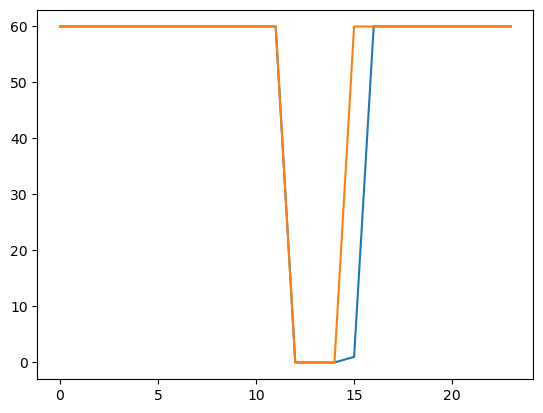

In [10]:
fig, ax = plt.subplots()

ax.plot(m3b.dual.energy_balance, label="Electricity price (3b)")
ax.plot(m22c.dual.energy_balance, label="Electricity price (2c)")